# Time Series in Pandas

In [746]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from vega_datasets import data

## SF Temps

In [747]:
df = data.sf_temps()

### 1) 
Resample by the day and take the average temperature. Visualize the average temperature over time.

In [748]:
df = df.set_index('date').sort_values(by='date')

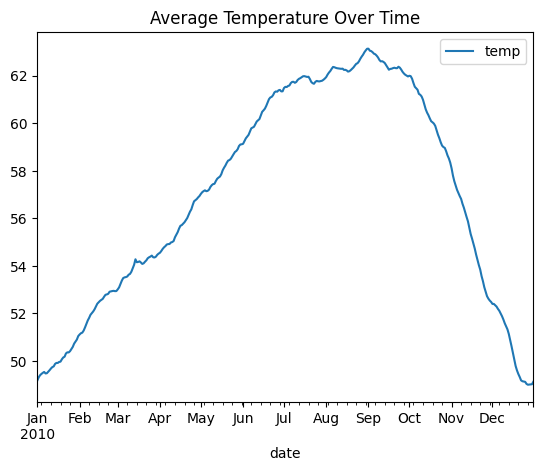

In [749]:
df.resample('d').mean().plot()
plt.title('Average Temperature Over Time')
plt.show()

### 2) 
Write the code necessary to visualize the minimum temperature over time.

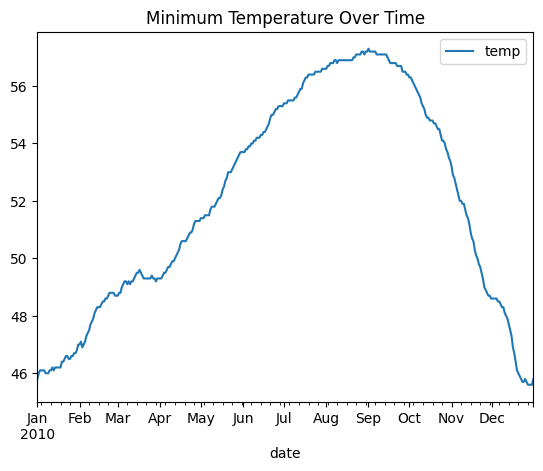

In [750]:
df.resample('d').min().plot()
plt.title('Minimum Temperature Over Time')
plt.legend()
plt.show()

### 3) 
Write the code necessary to visualize the maximum temperature over time.

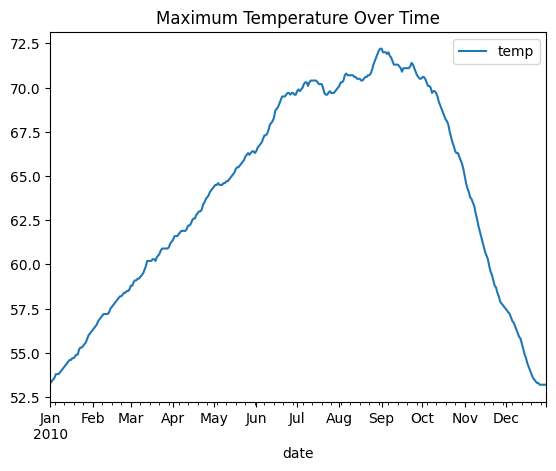

In [751]:
df.resample('d').max().plot()
plt.title('Maximum Temperature Over Time')
plt.legend()
plt.show()

### 4)
   Which month is the coldest, on average?

In [752]:
df2 = df.copy()
df2.index = df.index.month_name()
df2.groupby('date').temp.mean().idxmin()

'January'

In [753]:
df2.index = df.index.month_name()

In [754]:
df2.groupby('date').temp.mean().idxmin()

'January'

### 5)
Which month has the highest average temperature?

In [755]:
df2 = df.copy()

In [756]:
df2.index = df.index.month_name()

In [757]:
df2.groupby('date').temp.mean().idxmax()

'September'

### 6) 
Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [758]:
# Resample by the day and calculate the min and max temperature for each day
daily_temps = df.resample('d')['temp'].agg(['min', 'max'])

In [759]:
# Calculate the change in temperature for each day
daily_temps['temp_change'] = daily_temps['max'] - daily_temps['min']

In [760]:
# Extract the month from the datetime index
daily_temps['month'] = daily_temps.index.month

In [761]:
# Calculate the mean daily temperature change for each month
monthly_variability = daily_temps.resample('m')['temp_change'].mean()

In [762]:
# Find the month with the highest daily temperature variability
monthly_variability.idxmax().month_name()

'September'

### 7) 
Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [763]:
# Resample by the day and calculate the min, average and max temperature for each day
daily_agg_temps = df.resample('d')['temp'].agg(['min', 'mean', 'max'])

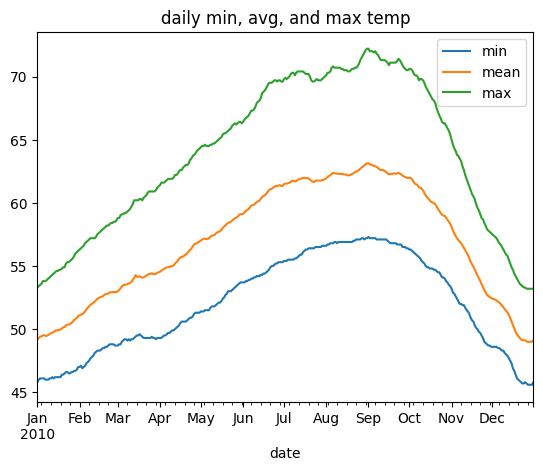

In [764]:
daily_agg_temps.plot()
plt.title('daily min, avg, and max temp')
plt.legend()
plt.show()

## Seattle Weather

In [765]:
df = data.seattle_weather()

### 1)
Which year and month combination has the highest amount of precipitation?

In [766]:
df = df.set_index('date').sort_values(by='date')

In [767]:
# Extract the year and month from the datetime index
df['year'] = df.index.year
df['month'] = df.index.month

# Resample the data by month, summing the precipitation for each month
monthly_prec = df.resample('M')['precipitation'].sum()

# Find the year and month with the highest total precipitation
max_prec_month = monthly_prec.idxmax()

# Extract the year and month from the result
max_prec_month.year, max_prec_month.month_name()

(2015, 'December')

### 2)
Visualize the amount of monthly precipitation over time.

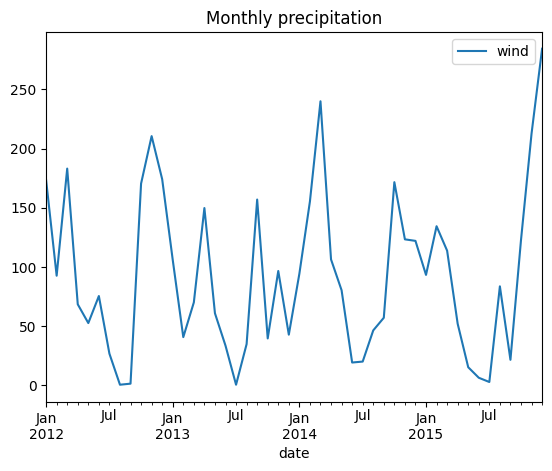

In [768]:
monthly_prec.plot(label='wind')
plt.title('Monthly precipitation')
plt.legend()
plt.show()

### 3)
Visualize the amount of wind over time. Choose a time interval you think is appropriate.

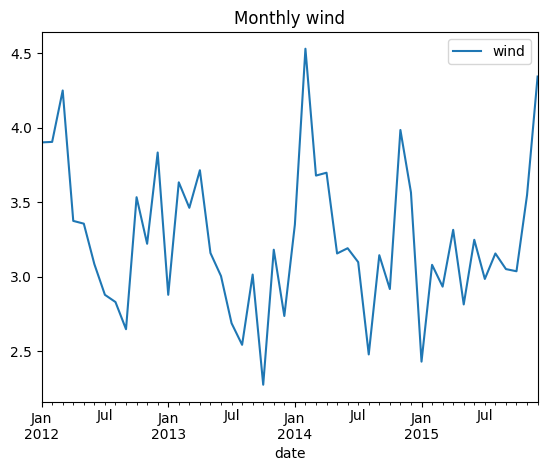

In [769]:
df.resample('M')['wind'].mean().plot()
plt.title('Monthly Wind')
plt.legend()
plt.show()

### 4) 
Which year-month combination is the windiest?

In [770]:
monthly_wind = df.resample('M')['wind'].sum()

max_wind_month = monthly_wind.idxmax()

max_wind_month.year, max_wind_month.month_name()

(2015, 'December')

### 5) 
What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [771]:
df[df['weather'] == 'sun'].resample('Y')['weather'].count().idxmax().year

2014

### 6) 
In which month does it rain the most?

In [772]:
df[df['weather'] == 'rain'].resample('M')['weather'].count().idxmax().month_name()

'November'

### 7)
Which month has the most number of days with a non-zero amount of precipitation?

In [773]:
df[df['precipitation'] > 0].resample('M')['precipitation'].count().idxmax().month_name()

'December'

In [774]:
df[df['precipitation'] > 0].resample('M')['precipitation'].count().idxmax()

Timestamp('2012-12-31 00:00:00')

## Data flights_20k

In [775]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


### 1) 
Convert any negative delays to 0.

In [776]:
df = df.set_index('date').sort_values(by='date')

In [777]:

df['delay'] = np.maximum(df['delay'], 0)
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### 2) 
Which hour of the day has the highest average delay?

In [778]:
df.resample('H')['delay'].mean().idxmax().strftime('%H:%Mpm')

'03:00pm'

In [779]:
df.resample('H')['delay'].mean().idxmax()

Timestamp('2001-02-23 03:00:00')

### 3)
   Does the day of the week make a difference in the delay amount?

In [780]:
df.resample('D')['delay'].mean().idxmax()

Timestamp('2001-01-12 00:00:00')

In [781]:
df2 = df.copy()

In [782]:
df2.index = df.index.day_name()

In [783]:
df2.groupby('date').delay.mean().idxmax()

'Friday'

### 4) 
Does the month make a difference in the delay amount?

In [784]:
df2.index = df.index.month_name()

In [785]:
df2.groupby('date').delay.mean().idxmax()

'February'

## Bonus

In [786]:
df = data.iowa_electricity()

### 1) 
For each row, calculate the percentage of the year's total that energy source provided.

In [787]:
df = df.set_index('year').sort_values(by='year')

In [788]:
# Calculate the total energy provided for each year
yearly_totals = df.groupby('year')['net_generation'].transform('sum')

# Calculate the percentage of the yearly total for each row
df['percentage_of_total'] = (df['net_generation'] / yearly_totals) * 100

df.head()

,source,net_generation,percentage_of_total
year,,,
2001-01-01,Fossil Fuels,35361,86.986790
2001-01-01,Nuclear Energy,3853,9.478242
2001-01-01,Renewables,1437,3.534968
2002-01-01,Fossil Fuels,35991,84.628950
2002-01-01,Nuclear Energy,4574,10.755267


### 2) 
Lineplot of generation over time, color by source

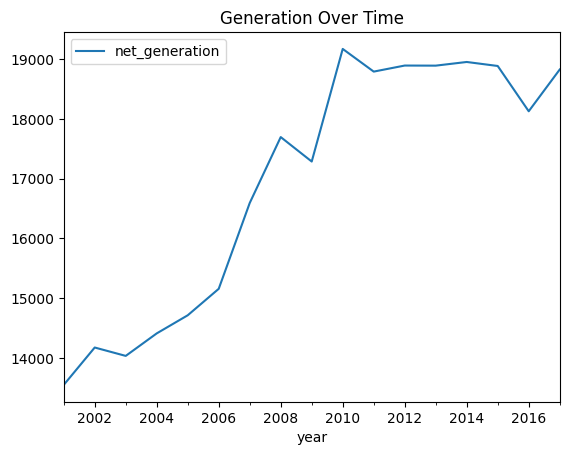

In [795]:
df.resample('Y')['net_generation'].mean().plot()
plt.title('Generation Over Time')
plt.legend()
plt.show()

### 3) 
Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [790]:
df.T

year,2001-01-01,2001-01-01,2001-01-01,2002-01-01,2002-01-01,2002-01-01,2003-01-01,2003-01-01,2003-01-01,2004-01-01,...,2014-01-01,2015-01-01,2015-01-01,2015-01-01,2016-01-01,2016-01-01,2016-01-01,2017-01-01,2017-01-01,2017-01-01
source,Fossil Fuels,Nuclear Energy,Renewables,Fossil Fuels,Nuclear Energy,Renewables,Fossil Fuels,Nuclear Energy,Renewables,Fossil Fuels,...,Fossil Fuels,Fossil Fuels,Nuclear Energy,Renewables,Renewables,Fossil Fuels,Nuclear Energy,Fossil Fuels,Nuclear Energy,Renewables
net_generation,35361,3853,1437,35991,4574,1963,36234,3988,1885,36205,...,35250,32319,5243,19091,21241,28437,4703,29329,5214,21933
percentage_of_total,86.98679,9.478242,3.534968,84.62895,10.755267,4.615783,86.0522,9.471109,4.47669,83.738089,...,62.000915,57.047288,9.254585,33.698127,39.059598,52.292161,8.648241,51.931794,9.23224,38.835966


### 4)
Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?f

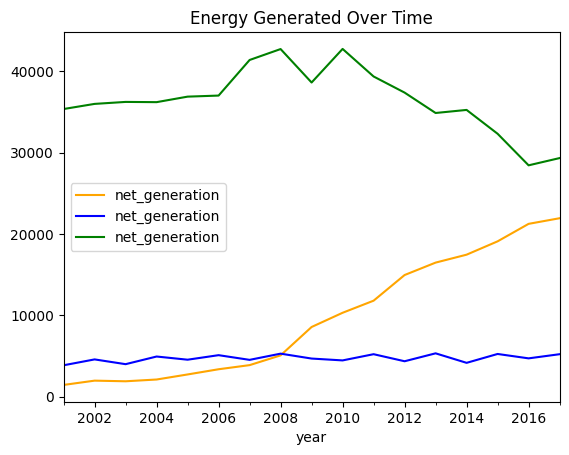

In [797]:
df[df['source']=='Renewables'].resample('Y')['net_generation'].mean().plot(c='orange')
df[df['source']=='Nuclear Energy'].resample('Y')['net_generation'].mean().plot(c='blue')
df[df['source']=='Fossil Fuels'].resample('Y')['net_generation'].mean().plot(c='green')
plt.title('Energy Generated Over Time')
plt.legend()
plt.show()

### 5) 
Is the total generation increasing over time?

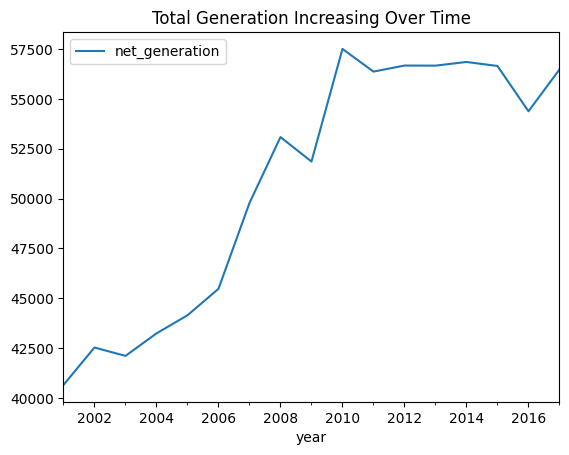

In [799]:
df.resample('Y')['net_generation'].sum().plot()
plt.title('Total Generation Increasing Over Time')
plt.legend()
plt.show()

### 6) 
How would you control for increasing consumption over time when considering how much energy is coming from each source?


### 7)
   express each number as a % of the year's total

### 3) 
Visualize the amount of wind over time. Choose a time interval you think is appropriate.

### 4) 
Which year-month combination is the windiest?

### 5) 
What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

### 6) 
In which month does it rain the most?

### 7) 
Which month has the most number of days with a non-zero amount of precipitation?